In [141]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv("NetflixOriginals.csv",encoding= "ISO-8859-1")
print(data)

                                           Title                  Genre  \
0                                Enter the Anime            Documentary   
1                                    Dark Forces               Thriller   
2                                        The App  Science fiction/Drama   
3                                 The Open House        Horror thriller   
4                                    Kaali Khuhi                Mystery   
..                                           ...                    ...   
579        Taylor Swift: Reputation Stadium Tour           Concert Film   
580  Winter on Fire: Ukraine's Fight for Freedom            Documentary   
581                      Springsteen on Broadway           One-man show   
582    Emicida: AmarElo - It's All For Yesterday            Documentary   
583     David Attenborough: A Life on Our Planet            Documentary   

              Premiere  Runtime  IMDB Score                  Language  
0       August 5, 2019     

Counter({'English': 159, 'Hindi': 27, 'Spanish': 13, 'Indonesian': 6, 'Italian': 6, 'French': 5, 'Korean': 5, 'Portuguese': 5, 'Japanese': 4, 'Marathi': 3, 'German': 2, 'Polish': 2, 'Turkish': 2, 'Dutch': 1, 'English/Akan': 1, 'English/Arabic': 1, 'English/Japanese': 1, 'English/Korean': 1, 'Filipino': 1, 'Khmer/English/French': 1, 'Malay': 1, 'Spanish/Catalan': 1, 'Tamil': 1, 'Thai': 1})


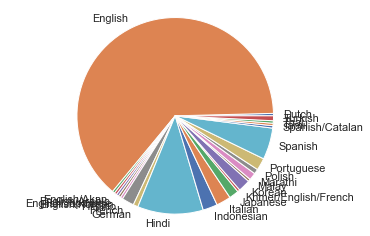

In [142]:
# Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.
# 100+ları uzun soluklu varsaydım

df = pd.DataFrame(data, columns = ['Runtime','Language'])
df2 = df[(df['Runtime']>=100 )].sort_values('Language')
dilsayisi=Counter(df2['Language'])
 
print(dilsayisi)
labels = []
sizes = []

for x, y in dilsayisi.items():
    labels.append(x)
    sizes.append(y)
plt.pie(sizes, labels=labels)
plt.axis('equal')
plt.show()


           Genre   Premiere  IMDB Score
0    Documentary 2019-08-05         2.5
15   Documentary 2019-12-19         4.3
20   Documentary 2019-09-13         4.4
30   Documentary 2019-05-24         4.6
111  Documentary 2019-10-16         5.5
290  Documentary 2019-08-28         6.3
286  Documentary 2019-03-29         6.3
263  Documentary 2019-05-22         6.3
295  Documentary 2019-09-25         6.4
303  Documentary 2020-04-29         6.4
334  Documentary 2019-06-14         6.5
324  Documentary 2019-03-21         6.5
320  Documentary 2019-10-28         6.5
353  Documentary 2019-10-25         6.6
384  Documentary 2019-07-10         6.7
367  Documentary 2019-11-20         6.7
378  Documentary 2019-10-28         6.7
394  Documentary 2019-05-03         6.8
401  Documentary 2020-05-11         6.8
396  Documentary 2020-05-06         6.8
392  Documentary 2020-03-20         6.8
443  Documentary 2019-05-17         7.0
442  Documentary 2019-04-26         7.0
436  Documentary 2019-11-20         7.0


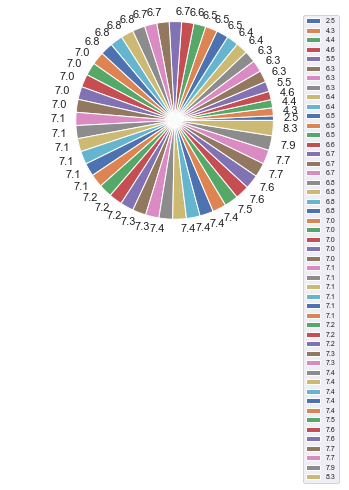

In [143]:
#2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

from datetime import datetime

df = pd.DataFrame(data, columns = ['Genre','Premiere','IMDB Score'])
df = df[(df['Genre']=='Documentary' )].sort_values('Premiere')
df.replace('\.',',', regex=True,inplace=True)

df['Premiere'] = pd.to_datetime(df['Premiere'])
new_date=df[(df['Premiere'] > '2019-01-01') & (df['Premiere'] < '2020-06-01')]
new_date=new_date.sort_values('IMDB Score')
print(new_date.sort_values('IMDB Score'))

plt.pie(new_date['IMDB Score'],labels = new_date['IMDB Score'])
plt.legend(new_date['IMDB Score'],loc =1,fontsize =7 )
plt.axis('equal')
plt.show()

In [144]:
#İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

df = pd.DataFrame(data, columns = ['Language','IMDB Score','Genre'])
df = df[(df['Language'] =='English' )].sort_values('Language')
df=df.groupby('Genre').sum()
df.sort_values(by=['IMDB Score'], inplace=True,ascending=False)
print(f'İngilizce çekilen filmler içerisinde en yüksek IMDB puanına sahip tür:  \n {df.head(1)[1]}')

KeyError: 1

In [ ]:
#Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?
df = pd.DataFrame(data, columns = ['Language','Runtime'])
df = df[(df['Language'] =='Hindi' )]
df = df['Runtime'].sum() / len(df['Runtime'])
print(f'Hindi Dilinde çekilmiş olan filmlerin ortalama runtime suresi: {df:.0f} dakikadır.')


Hindi Dilinde çekilmiş olan filmlerin ortalama runtime suresi: 116 dakikadır.


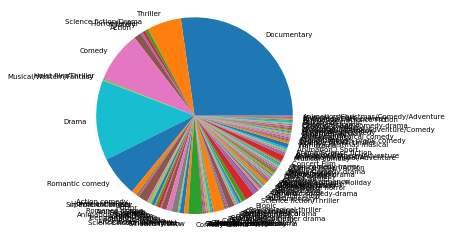

In [ ]:
#'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.
df = pd.DataFrame(data, columns = ['Genre'])
Türsayisi=Counter(df['Genre'])
labels2 = []
sizes2 = []

for x, y in Türsayisi.items():
    labels2.append(x)
    sizes2.append(y)

plt.pie(sizes2, labels=labels2, textprops={'fontsize': 7})
plt.axis('equal')
plt.show()


In [ ]:
#•	Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

df = pd.DataFrame(data, columns = ['Language'])
dilsayisi =Counter(df['Language'])
df2 = pd.DataFrame.from_dict(dilsayisi, orient='index').sort_values(dilsayisi[1],ascending=False)
print(f'Diller :  \n {df2.head(3)}')

Diller :  
            0
English  401
Hindi     33
Spanish   31


In [ ]:
#•	IMDB puanı en yüksek olan ilk 10 film hangileridir? 
df = pd.DataFrame(data, columns = ['IMDB Score','Title']).sort_values("IMDB Score",ascending=False)

print(f'puan  \n {df.head(10)}')

puan  
      IMDB Score                                        Title
583         9.0     David Attenborough: A Life on Our Planet
582         8.6    Emicida: AmarElo - It's All For Yesterday
581         8.5                      Springsteen on Broadway
580         8.4  Winter on Fire: Ukraine's Fight for Freedom
579         8.4        Taylor Swift: Reputation Stadium Tour
578         8.4   Ben Platt: Live from Radio City Music Hall
577         8.3                       Dancing with the Birds
576         8.3                      Cuba and the Cameraman 
573         8.2                                        Klaus
571         8.2                                         13th


[[[[  2.5  58. ]
   [  2.6  81. ]
   [  2.6  79. ]
   ...
   [  8.5 153. ]
   [  8.6  89. ]
   [  9.   83. ]]]


 [[[  2.5  58. ]
   [  2.6  81. ]
   [  2.6  79. ]
   ...
   [  8.5 153. ]
   [  8.6  89. ]
   [  9.   83. ]]]]


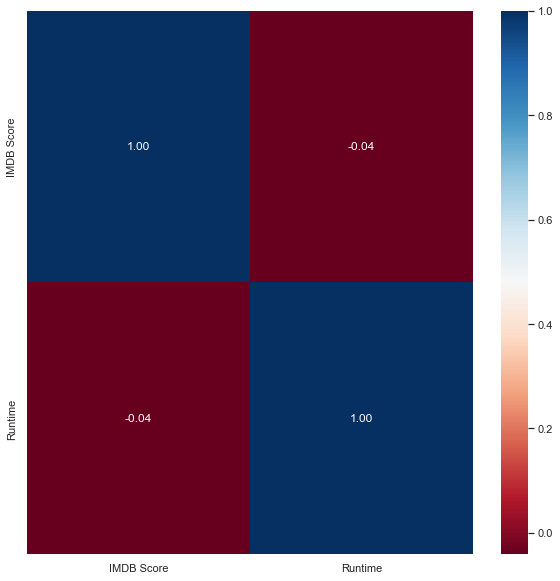

In [ ]:
#•	IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz 

df = pd.DataFrame(data, columns = ['IMDB Score','Runtime'])


matrix = np.array([[df],[df]])
print(matrix)
correlation= df.corr()
sns.set(rc={'figure.figsize': (10,10)})
sns.heatmap(correlation, annot=True,fmt=".2f",cmap="RdBu")
plt.show()


Imbd yüksek 10 tür:  
      IMDB Score                                 Genre
583         9.0                           Documentary
582         8.6                           Documentary
581         8.5                          One-man show
580         8.4                           Documentary
579         8.4                          Concert Film
578         8.4                          Concert Film
577         8.3                           Documentary
576         8.3                           Documentary
573         8.2  Animation/Christmas/Comedy/Adventure
571         8.2                           Documentary


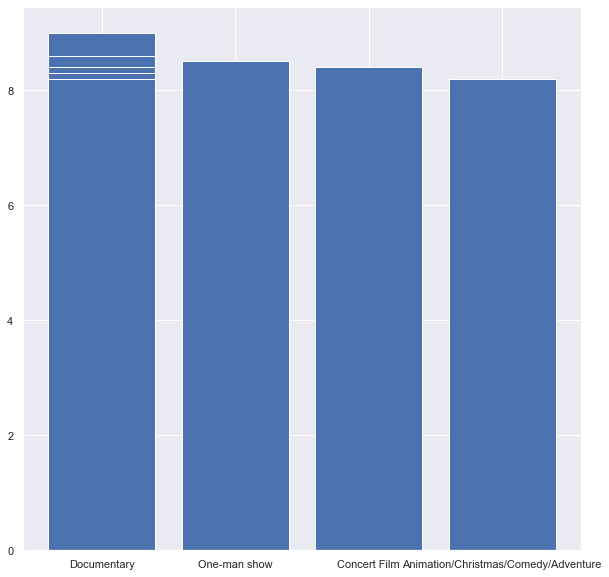

In [ ]:
#•	IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

df = pd.DataFrame(data, columns = ['IMDB Score','Genre']).sort_values("IMDB Score",ascending=False)
print(f'Imbd yüksek 10 tür:  \n {df.head(10)}')
plt.bar(df.head(10)['Genre'],df.head(10)['IMDB Score']) 
plt.show()


Runtime yüksek 10 film: 
                                Title  Runtime
5                              Drive      147
194                 Army of the Dead      148
7    The Last Days of American Crime      149
543                             Ludo      149
509                   Raat Akeli Hai      149
247                         Citation      151
284               The Forest of Love      151
581          Springsteen on Broadway      153
328                      Da 5 Bloods      155
561                     The Irishman      209


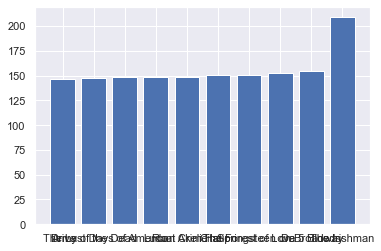

In [147]:

#•	'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz. 
df = pd.DataFrame(data, columns = ['Title','Runtime'])
df2=df.sort_values(by="Runtime", ascending=True)
print(f'Runtime yüksek 10 film: \n {df2.tail(10)}')
x = df2["Title"].tail(10)
y = df2["Runtime"].tail(10)
plt.bar(x,y) 
plt.show()


En fazla film olan tarih ve film sayısı 
         0
2020  183 adet


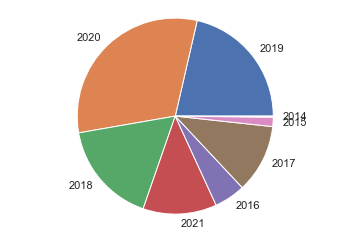

In [163]:
#Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

df = pd.DataFrame(data, columns = ['Premiere'])

df2 = df['Premiere'] = pd.to_datetime(df['Premiere'])
df2 = df['yıl'] = df['Premiere'].dt.year

df3 =Counter(df['yıl'])

df4= pd.DataFrame.from_dict(df3, orient='index').sort_values(df3[1],ascending=False)
print(f'En fazla film olan tarih ve film sayısı \n {df4.head(1)} adet')
labels = []
sizes = []

for x, y in df3.items():
    labels.append(x)
    sizes.append(y)
plt.pie(sizes, labels=labels)
plt.axis('equal')
plt.show() 

     IMDB Score                  Language
0           2.5          English/Japanese
1           2.6                   Spanish
2           2.6                   Italian
3           3.2                   English
4           3.4                     Hindi
..          ...                       ...
579         8.4                   English
580         8.4  English/Ukranian/Russian
581         8.5                   English
582         8.6                Portuguese
583         9.0                   English

[584 rows x 2 columns]
                  IMDB Score
Language                    
Korean              5.916667
Indonesian          5.844444
Dutch               5.800000
French              5.770000
Turkish             5.660000
German              5.640000
Spanish/Basque      5.600000
Italian             5.542857
Swedish             5.500000
Thai                5.450000
Polish              5.166667
Norwegian           5.100000
Filipino            5.100000
English/Japanese    4.400000
Malay   

Text(0.5, 1.0, 'Yayınlanan en düşük ortalama IMBD puanına sahip filmler  ')

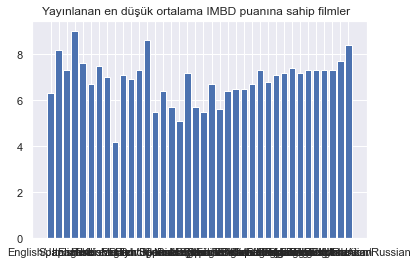

In [164]:
#  Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(data, columns = ['IMDB Score','Language'])
print(df)
df2 = df.groupby("Language").mean().sort_values("IMDB Score", ascending=False).tail(15)
print(df2)

plt.bar(df["Language"], df["IMDB Score"])
plt.title("Yayınlanan en düşük ortalama IMBD puanına sahip filmler  ")


In [170]:
#Hangi yılın toplam "runtime" süresi en fazladır?

df = pd.DataFrame(data, columns = ['Runtime','Premiere'])

df2 = df['Premiere'] = pd.to_datetime(df['Premiere'])
df2 = df['yıl'] = df['Premiere'].dt.year

df3 =Counter(df['yıl'])
print(df3)

df.groupby("yıl").agg({"Runtime": "sum"}).sort_values(by="Runtime", ascending=False)[0:1]


Counter({2020: 183, 2019: 125, 2018: 99, 2021: 71, 2017: 66, 2016: 30, 2015: 9, 2014: 1})


,Runtime
yıl,
2020,17384


In [172]:
#Her bir dilin en fazla kullanıldığı "Genre" nedir?
df = pd.DataFrame(data, columns = ['Language','Genre'])

df = df.groupby(["Language"])["Genre"].value_counts(sort=True).groupby(level=0).head(1)
print(df)



Language                    Genre                
Bengali                     Documentary                1
Dutch                       Crime drama                1
English                     Documentary              120
English/Akan                War drama                  1
English/Arabic              Documentary                1
English/Hindi               Documentary                2
English/Japanese            Crime drama                1
English/Korean              Action-adventure           1
English/Mandarin            Documentary                2
English/Russian             Documentary                1
English/Spanish             Documentary                5
English/Swedish             Documentary                1
English/Taiwanese/Mandarin  Drama                      1
English/Ukranian/Russian    Documentary                1
Filipino                    Drama                      1
French                      Documentary                6
Georgian                    Documentar

In [180]:
# 15. Veri setinde outlier veri var mıdır? Açıklayınız.

def grab_col_names(dataframe, T_=10, R_=20):

    c_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < T_ and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > R_ and
                   dataframe[col].dtypes == "O"]
    c_cols = c_cols + num_but_cat
    c_cols = [col for col in c_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]


    return c_cols, num_cols, cat_but_car


c_cols, num_cols, cat_but_car = grab_col_names(df, T_=5, R_=20)


def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(col, check_outlier(df, col, 0.1, 0.9))
    
print("Görüldüğü üzere datamızda outlier bulunmamıştır.")

AttributeError: 'Series' object has no attribute 'columns'